# Clustering Results

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import pickle
import time
import sys

# Custom Libraries
sys.path.insert(0, '../dev/')
import ssbplots as cp
import detector

# Suppresses all plotting warnings for cleaner visuals
# import warnings
# warnings.filterwarnings('ignore')

# Example Script Usage in Jupyter

In [2]:
# clusters = ",".join(list(map(str, range(2, 11))))
# clusters

In [3]:
# start = time.time()
# %run -i ../dev/clusters.py -l data_509/stp_all_sites_v3.csv -k data_509/kernels -c {clusters} -t 0 -s 42 -e kmeans_t0_exp_509_2-10
# print("Time elapsed: {:.2f} s".format(time.time() - start))

# Using `kmeans_exp()` in mpc_defs.py
# Time elapsed: 48.00 s

In [4]:
# start = time.time()
# %run -i ../dev/clusters.py -l data_268/stp_cluster_sites_pop.csv -k data_268/kernels -c {clusters} -t 0 -s 42 -e kmeans_t0_exp_268_2-10
# print("Time elapsed: {:.2f} s".format(time.time() - start))

# Using `kmeans_exp()` in mpc_defs.py
# Time elapsed: 17.43 s

# Setup

In [5]:
# NOTE: results were produced using a random state of 42
outputs509 = {}
outputs268 = {}
outputs    = {}
with open('outputs/kmeans_t0_exp_509_2-10.pkl', 'rb') as inp509,\
     open('outputs/kmeans_t0_exp_268_2-10.pkl', 'rb') as inp268:
    outputs509 = pickle.load(inp509)
    outputs268 = pickle.load(inp268)
    for c in outputs509:
        outputs[c] = dict(**outputs509[c], **outputs268[c])

In [6]:
clusters = list(outputs.keys())
kernels  = list(outputs[clusters[0]].keys())
print("Kernels:")
for k in kernels:
    print(f"\t{k}")

Kernels:
	kernel_regular_10k
	kernel_regular_2500
	kernel_regular_5000
	kernel_regular_7500
	kernel_1
	kernel_1_2500
	kernel_1_5000
	kernel_2
	kernel_2_2500
	kernel_2_5000


# Experiment Synopsis

- ### Goals:
    - Explore the variations in spatial detection across multiple kernels as the number of clusters changes.
    - For a given kernel and clustering value, analyze population over time for each node and for each community.
<br><br>
- ### Details:
    - Clustering method: 
        - K-means
    - Number of clusters explored: 
        - $\{2, 3, ..., 10\}$
    - Kernels involved:
        - kernel_1 (all, size 268 x 268)
        - kernel_2 (all, size 268 x 268)
        - kernel_regular (all, size 509 x 509)
    - Locations:
        - stp_cluster_sites_pop (size 268)
        - stp_all_sites_v3 (size 509)
    - Detector settings:
        - Bridge tolerance: 0.25
        - Bridge heuristic: |out - in| $\leq$ 0.25 * (max proportion out of any community)
        - Steady state tolerance: 0.05
        - Model: $\vec{p}_{t} = K^{t}\vec{p}_{0}$
<br><br>

- ### Questions of Interest:
    - Do some kernels reach steady state faster than others? If so which ones?
    - How does each kernel reach steady state? In other words, how does the population of a particular kernel change over time?
    - Do all communities have roughly the same size at steady state? Or is one community more popular than another?
    - How do community population sizes change over time?
    - For a given cluster size, does the number of sinks, sources, and bridges differ among each kernel?
    - How does the number of sinks, sources, and bridges change with clustering size?

# How does each kernel reach steady state?

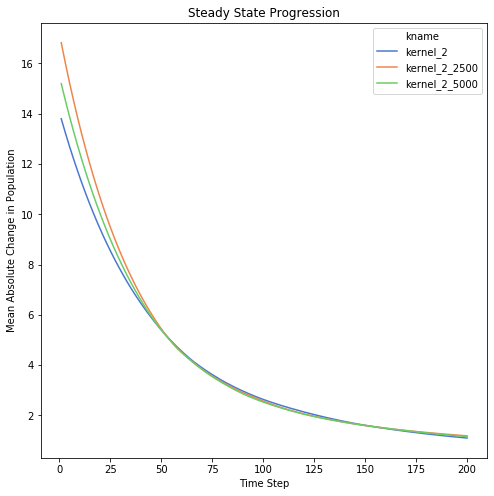

In [7]:
cp.plot_avg_abs_change_in_population(outputs, 
                                     kernels=[
                                         'kernel_2',
                                         'kernel_2_2500',
                                         'kernel_2_5000'
                                     ],
                                     k=201,
                                     final=200)

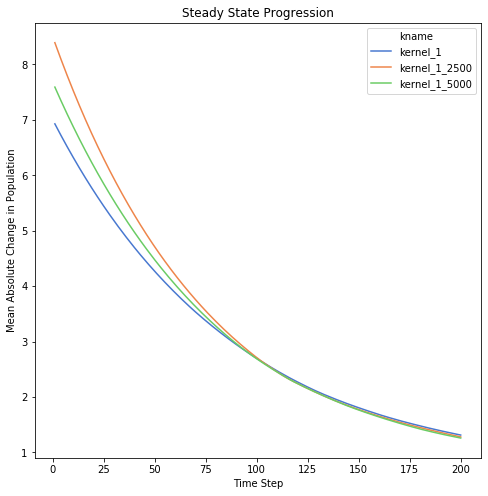

In [8]:
cp.plot_avg_abs_change_in_population(outputs, 
                                     kernels=[
                                         'kernel_1',
                                         'kernel_1_2500',
                                         'kernel_1_5000'
                                     ],
                                     k=201,
                                     final=200)

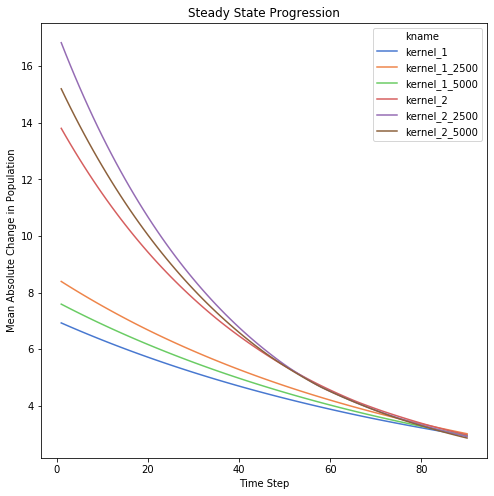

In [9]:
cp.plot_avg_abs_change_in_population(outputs, 
                                     kernels=[
                                         'kernel_2',
                                         'kernel_2_2500',
                                         'kernel_2_5000',
                                         'kernel_1',
                                         'kernel_1_2500',
                                         'kernel_1_5000'
                                     ],
                                     k=91,
                                     final=90)

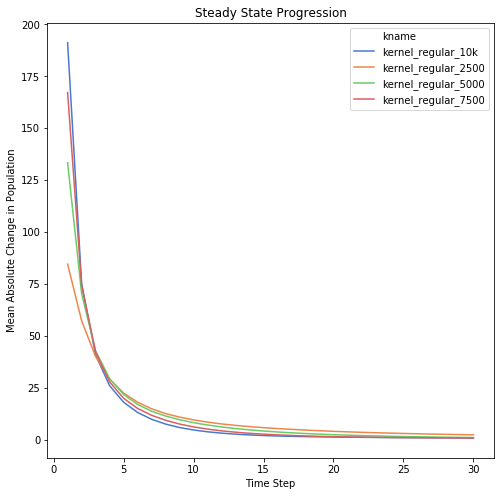

In [10]:
cp.plot_avg_abs_change_in_population(outputs, 
                                     kernels=[
                                         'kernel_regular_2500',
                                         'kernel_regular_5000',
                                         'kernel_regular_7500',
                                         'kernel_regular_10k'
                                     ],
                                     k=31,
                                     final=30)

# How do populations change over time?

In [11]:
custom_range = list(range(0, 50, 5)) +\
               list(range(50, 1000, 100)) +\
               list(range(1000, 7000, 1000))

cp.plot_population_distribution(outputs, "kernel_2_2500", cluster_num=5, k=custom_range)

# Which communities had the largest number nodes?

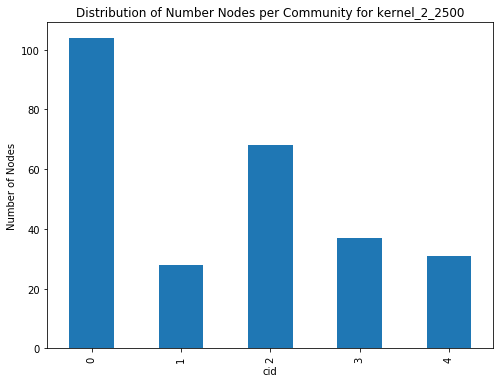

In [12]:
cp.community_nodes_barplot(outputs, 5, "kernel_2_2500")

# Which communities had the largest populations at steady state?

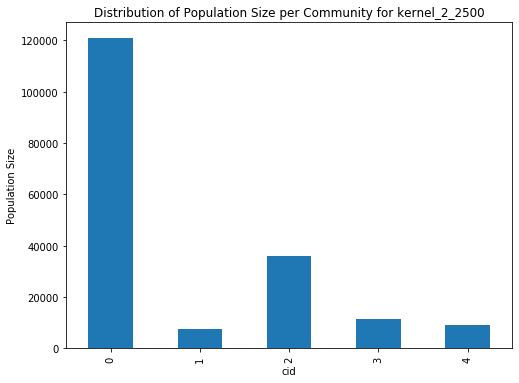

In [13]:
cp.community_populations_barplot(outputs, 5, "kernel_2_2500")

# Do communities with a large number of nodes also have a large population size at steady state?

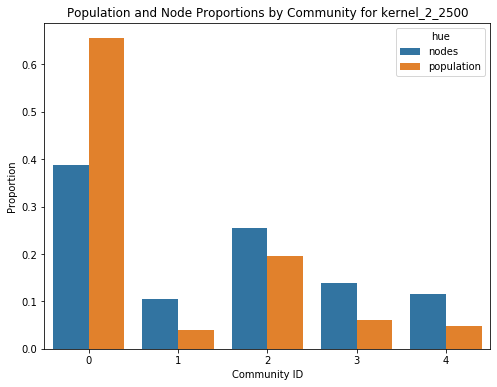

In [14]:
cp.community_proportions_barplot(outputs, 5, "kernel_2_2500", fs=(8, 6))

# How do community population sizes change over time?

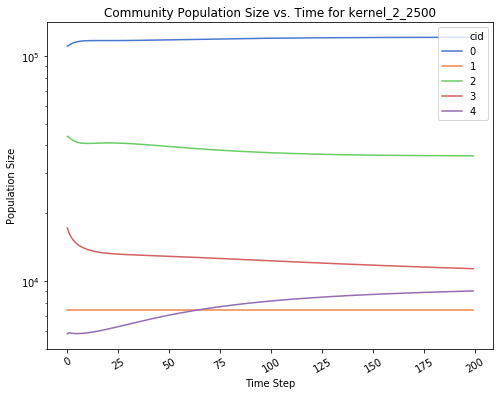

In [15]:
cp.community_populations_lineplot(outputs, 5, "kernel_2_2500")
plt.yscale('log');

# How do the number of sinks/sources/bridges compare across kernels at steady state?

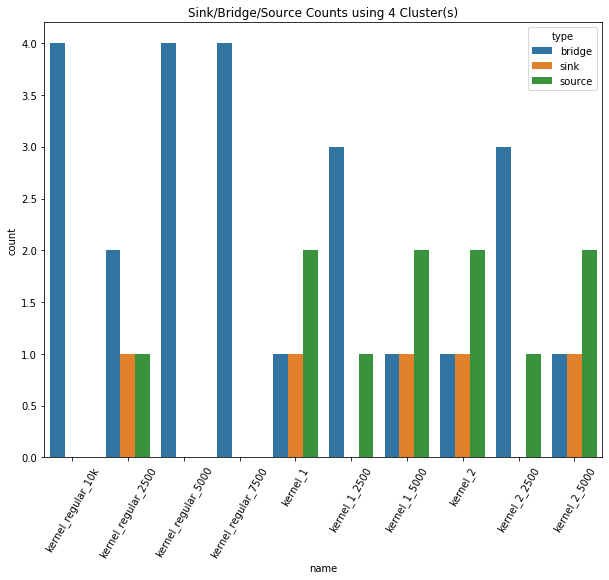

In [16]:
cp.label_counts_barplot(outputs, 4, fs=(10, 8))

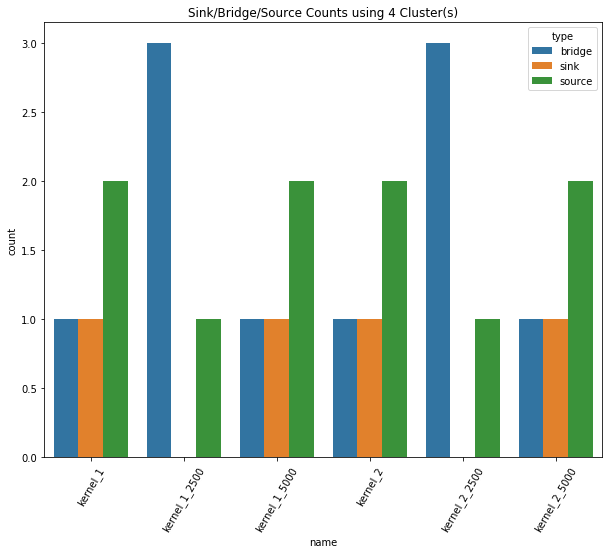

In [17]:
cp.label_counts_barplot(outputs, 4, 
                     kernels=["kernel_1",
                              "kernel_1_2500",
                              "kernel_1_5000",
                              "kernel_2",
                              "kernel_2_2500",
                              "kernel_2_5000"],
                     fs=(10, 8))

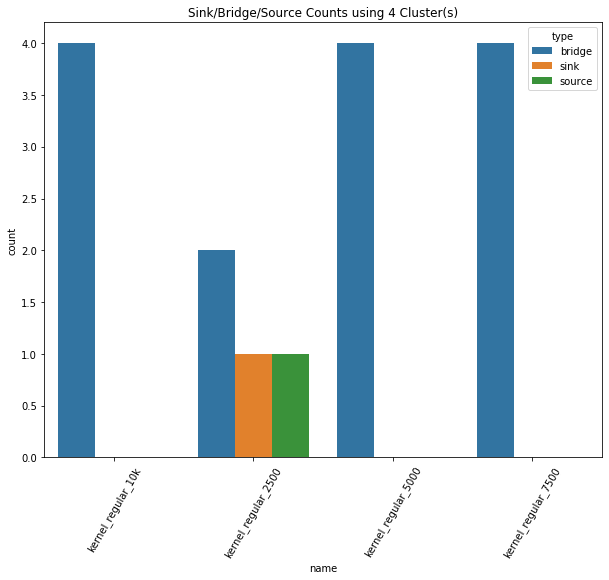

In [18]:
cp.label_counts_barplot(outputs, 4, 
                     kernels=["kernel_regular_10k",
                              "kernel_regular_2500",
                              "kernel_regular_5000",
                              "kernel_regular_7500"],
                     fs=(10, 8))

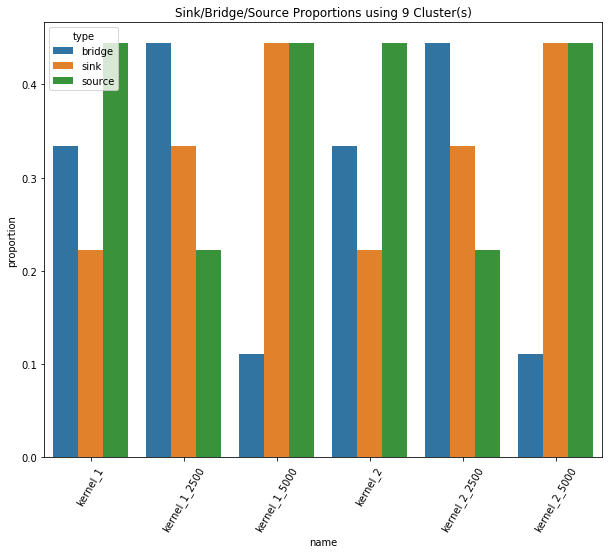

In [19]:
# For larger clustering values, we can examine proportions
cp.label_proportions_barplot(outputs, 9, 
                     kernels=["kernel_1",
                              "kernel_1_2500",
                              "kernel_1_5000",
                              "kernel_2",
                              "kernel_2_2500",
                              "kernel_2_5000"],
                     fs=(10, 8))

# Is there a relationship between the number of clusters and the number of sinks, sources, and bridges?

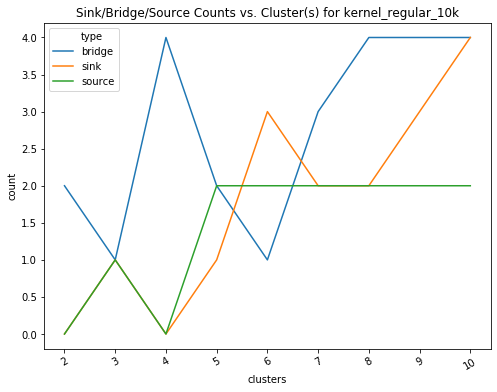

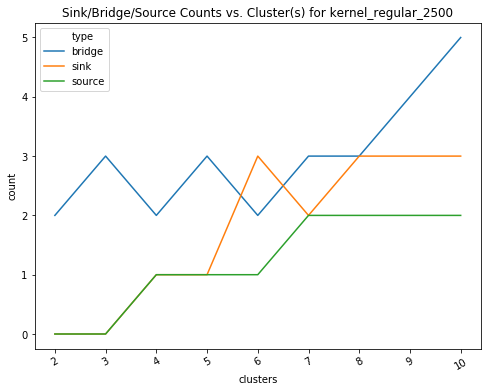

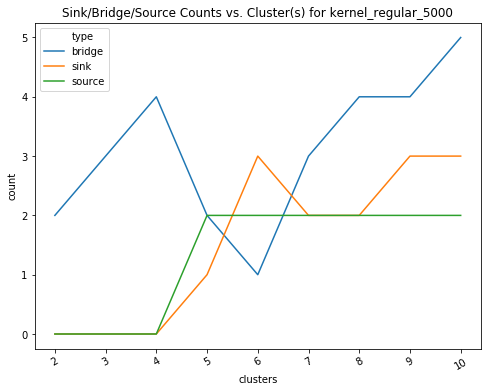

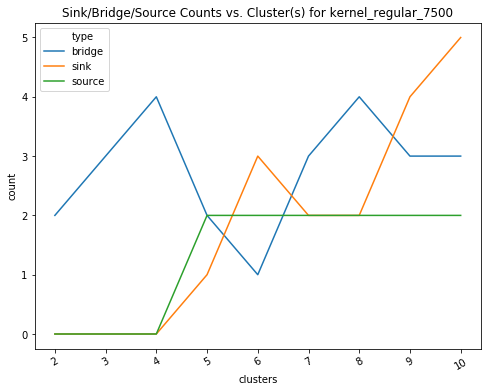

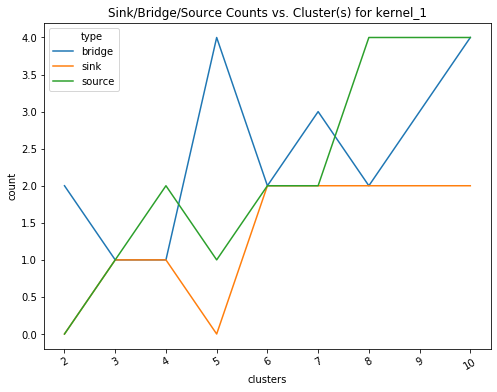

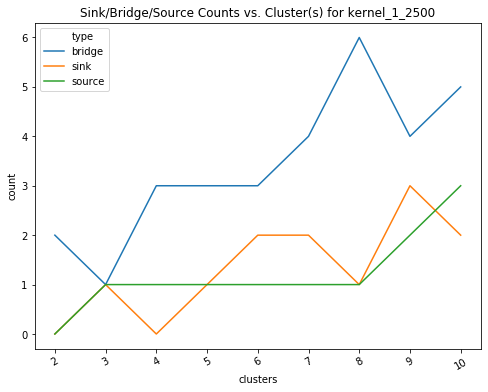

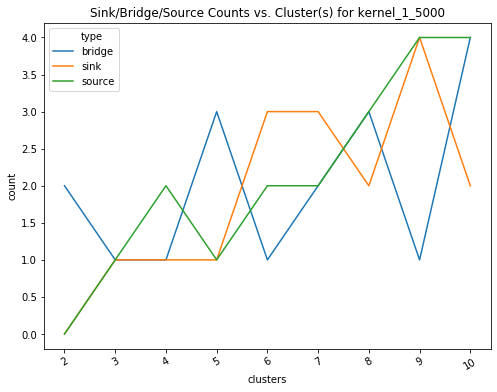

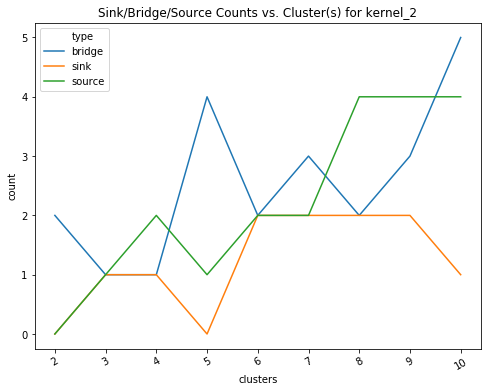

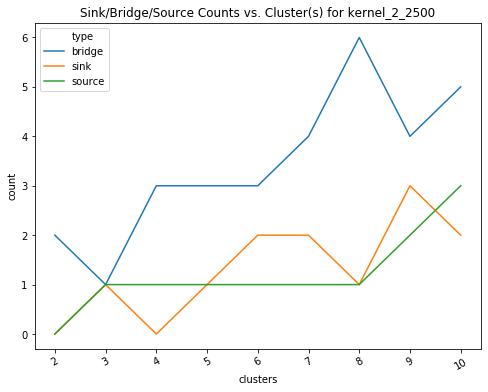

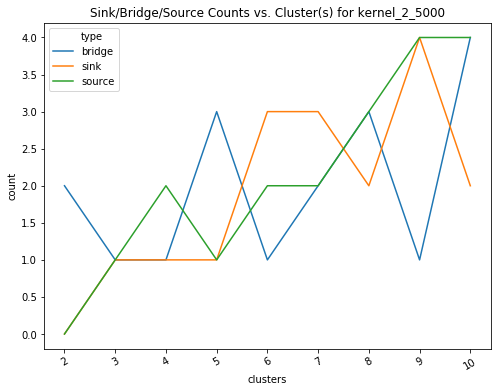

In [20]:
for k in kernels:
    cp.label_counts_lineplot(outputs, k)

# Network Plots

In [21]:
import matplotlib.cm as cmx
import geojson

# To plot a background, convert the SHP file(s) to a geojson file
# Use: https://mygeodata.cloud/converter/shp-to-geojson
with open("geojson/STP.geojson") as json_file:
    json_data = geojson.load(json_file)
    
sao_tome_geo = [json_data['features'][1]]
principe_geo = [json_data['features'][0]]
both_loc_geo = json_data['features']

In [22]:
# This will add nonnegative Gaussian noise to the edges to make them easier to see
def jitter_edges(weights, mean=0, stddev=1):
    return weights + np.abs(np.random.normal(mean, stddev, size=len(weights)))

KERNEL_NAME = 'kernel_2_5000'
CLUSTER_NUM = 3

In [23]:
# This retrieves the required parameters for `plot_netowrk`
s = outputs[CLUSTER_NUM][KERNEL_NAME]
nodes = s.ndata()

principe_locs = nodes[nodes['lat'] > 1.25]
principe_tmtx = s.tmtx.T[principe_locs.index.to_numpy()[:, None], principe_locs.index]

sao_tome_locs = nodes[nodes['lat'] < 0.50]
sao_tome_tmtx = s.tmtx.T[sao_tome_locs.index.to_numpy()[:, None], sao_tome_locs.index]

In [24]:
# Create copies for exploration
st_locs = sao_tome_locs.copy()
p_locs = principe_locs.copy()

In [25]:
# Get location populations at steady state
st_locs['pop'] = s.migrate(s.ss_step)[sao_tome_locs.index]

cp.plot_network(sao_tome_tmtx, st_locs,
                nodes_cm=cmx.get_cmap('cool')   , nodes_cb=False,
                edges_cm=cmx.get_cmap('Purples'), edges_cb=True,
                bordr_cm=cmx.get_cmap('gray')   , bordr_cb=True,
                cb_xlocs=[1.02, 1.15],
                min_prob=0.001,
                edges_fn=jitter_edges,
                geo_data=sao_tome_geo,
                fig_wdth=650, fig_hght=600)

In [26]:
# Get initial location populations
st_locs['pop'] = sao_tome_locs['pop']

cp.plot_network(sao_tome_tmtx, st_locs,
                nodes_cm=cmx.get_cmap('cool')   , nodes_cb=False,
                edges_cm=cmx.get_cmap('Purples'), edges_cb=True,
                bordr_cm=cmx.get_cmap('gray')   , bordr_cb=True,
                cb_xlocs=[1.02, 1.15],
                min_prob=0.001,
                nodes_fn=lambda n: np.log(n) / np.log(4),
                bordr_fn=lambda n: 1.75*n,
                edges_fn=jitter_edges,
                geo_data=sao_tome_geo,
                netwk_bg='#252525',
                fig_wdth=650, fig_hght=600)

In [27]:
# Separate into two categories: source and sink/bridge
st_locs['ctype'] = st_locs['ctype'].map({'source' : 'source', 'sink' : 'sink/bridge', 'bridge' : 'sink/bridge'})

# Color all nodes the same
st_locs['cid'] = 0

In [28]:
cp.plot_network(sao_tome_tmtx, st_locs,
                nodes_cm=cmx.get_cmap('gist_gray')   , nodes_cb=False,
                edges_cm=cmx.get_cmap('Purples'), edges_cb=False,
                bordr_cm=cmx.get_cmap('binary')   , bordr_cb=True,
                shufflec=True,
                rng_seed=42, #47, #45,
                cb_xlocs=[1.02],
                min_prob=1,
                nodes_fn=lambda n: [1] * len(n),
                bordr_fn=lambda b: [9] * len(b),
                edges_fn=lambda e: np.exp(e),
                geo_data=sao_tome_geo,
                fig_wdth=650, fig_hght=600)

In [29]:
# Color all nodes and borders the same
st_locs['ctype'] = 0
st_locs['cid'] = 0

cp.plot_network(sao_tome_tmtx, st_locs,
                nodes_cm=cmx.get_cmap('gist_gray')   , nodes_cb=False,
                edges_cm=cmx.get_cmap('Purples'), edges_cb=True,
                bordr_cm=cmx.get_cmap('gist_gray')   , bordr_cb=False,
                cb_xlocs=[1.02],
                min_prob=0.0015,
                nodes_fn=lambda n: [2] * len(n),
                bordr_fn=lambda b: [2] * len(b),
                edges_fn=lambda e: np.exp(e),
                geo_data=sao_tome_geo,
                netwk_bg='#252525',
                paper_bg='#c2c2c2',
                fig_wdth=650, fig_hght=600)

In [30]:
# Get location populations at steady state
p_locs['pop'] = s.migrate(s.ss_step)[principe_locs.index]
    
cp.plot_network(principe_tmtx, p_locs,
                nodes_cm=cmx.get_cmap('cool')   , nodes_cb=False,
                edges_cm=cmx.get_cmap('Purples'), edges_cb=True,
                bordr_cm=cmx.get_cmap('flag')   , bordr_cb=False,
                cb_xlocs=[1.02],
                min_prob=0.001, 
                edges_fn=jitter_edges,
                geo_data=principe_geo,
                fig_wdth=750, fig_hght=600)